# **Data Slayer 1.0 Competiton 🎉**

**Barudak Bojongsoang's Team 😎**

**Members:**


*   Akmal Muzakki Bakir
*   Muhammad Sya'bani Falif
*   Muhammad Zaki Rabbani



## **Importing Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180


In [ ]:
test_df.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,54938,FOLD,PICKUP TRUCK - STANDARD,5.0,8.0,AS10,X,14.20 liters per 100 km,15.20 liters per 100 km,16.06 MPG (AS)
1,54939,BMV,COMPACT,2.0,4.0,A8,Z,9.10 L/100 km,43.46 mpg Imp.,29.66 MPG (AS)
2,54940,JIPU,SUV - SMALL,1.3,4.0,A9,X,27.69 mpg Imp.,7.80 liters per 100 km,9.12 liters per 100 km
3,54941,LECUS,SUV - SMALL,not-recorded,4.0,AS6,Z,NaN,26.43 MPG (AS),NaN
4,54942,BARUSU,COMPACT,2.0,unestablished,M6,Z,11.36 km/L,39.79 mpg Imp.,8.04 L/100km


### **Assesing Data**

#### **Checking Data Types**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


#### **Checking Null Values**

In [ ]:
train_df.isna().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
dtype: int64

In [ ]:
round(2.02)

2

#### **Checking and Recording Inaccurate Values**

In [ ]:
train_df["Make"].unique().tolist()
train_df["Vehicle Class"].unique().tolist()
train_df["Engine Size(L)"].unique().tolist()
train_df["Cylinders"].unique().tolist()
train_df['Transmission'].unique().tolist()
train_df['Fuel Type'].unique().tolist()
train_df['Fuel Consumption City'].unique().tolist()
train_df['Fuel Consumption Hwy'].unique().tolist()
train_df['Fuel Consumption Comb'].unique().tolist()[:10]

['0.98 L/10km',
 '11.96 L/100km',
 '31.76 mpg Imp.',
 '14.78 liters per 100 km',
 '8.01 liters per 100 km',
 '9.81 L/100km',
 '32.87 mpg Imp.',
 '21.28 MPG (AS)',
 nan,
 'not-available']

### **Cleaning Data**

#### **Converting Inaccurate Values To NaN**

In [ ]:
inaccurate_values = ['-1', '0', '-9999', '9999', 'nan', 'zero', 'missing', 'not recorded', 'na', 'unspecified', 'unknown', 'unestablised', 'unestablished','not-available', 'not-recorded']

for column in train_df.columns[2:-1]:
    train_df[column] = train_df[column].str.strip().str.lower()
    train_df[column] = train_df[column].replace(inaccurate_values, np.nan)

    test_df[column] = test_df[column].str.strip().str.lower()
    test_df[column] = test_df[column].replace(inaccurate_values, np.nan)

#### **Creating A Function For Convert Various Units To Liters Per 100 km**

In [ ]:
def convert_to_liters_per_100_km(value):
    try:
        if 'mpg (as)' in value:
            mpg_value = float(value.split(' ')[0])
            return 235.215 / mpg_value
        elif 'mpg imp.' in value:
             mpg_value = float(value.split(' ')[0])
             return 282.481 / mpg_value
        elif 'km per l' in value:
            return 100 / float(value.split(' ')[0])
        elif 'l/10km' in value:
            return float(value.split(' ')[0]) * 10
        elif 'l/100km' in value:
            return float(value.split(' ')[0])
        elif 'l/100 km' in value:
            return float(value.split(' ')[0])
        elif 'liters per 100 km' in value:
            return float(value.split(' ')[0])
        elif 'km/l' in value:
            return 100 / float(value.split(' ')[0])
        else:
            return np.nan
    except:
        return np.nan

# Converting various units to liters per 100 km
selected_columns = ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]
for column in selected_columns:
    train_df[column] = train_df[column].apply(convert_to_liters_per_100_km)
    test_df[column] = test_df[column].apply(convert_to_liters_per_100_km)

#### **Converting Data Types**

In [ ]:
selected_columns = ["Engine Size(L)","Cylinders"]
for column in selected_columns:
    train_df[column].astype(float)
    test_df[column].astype(float)

#### **Replacng NaN Values With Median**

In [ ]:
numerical_columns = ["Engine Size(L)","Cylinders","Fuel Consumption City","Fuel Consumption Hwy","Fuel Consumption Comb"]
for column in numerical_columns:
    train_df[column].fillna(train_df[column].median(), inplace = True)
    test_df[column].fillna(test_df[column].median(), inplace = True)

categorical_columns = ["Transmission","Fuel Type"]
for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode(), inplace = True)
    test_df[column].fillna(test_df[column].mode(), inplace = True)

#### **Checking Outlier Values**

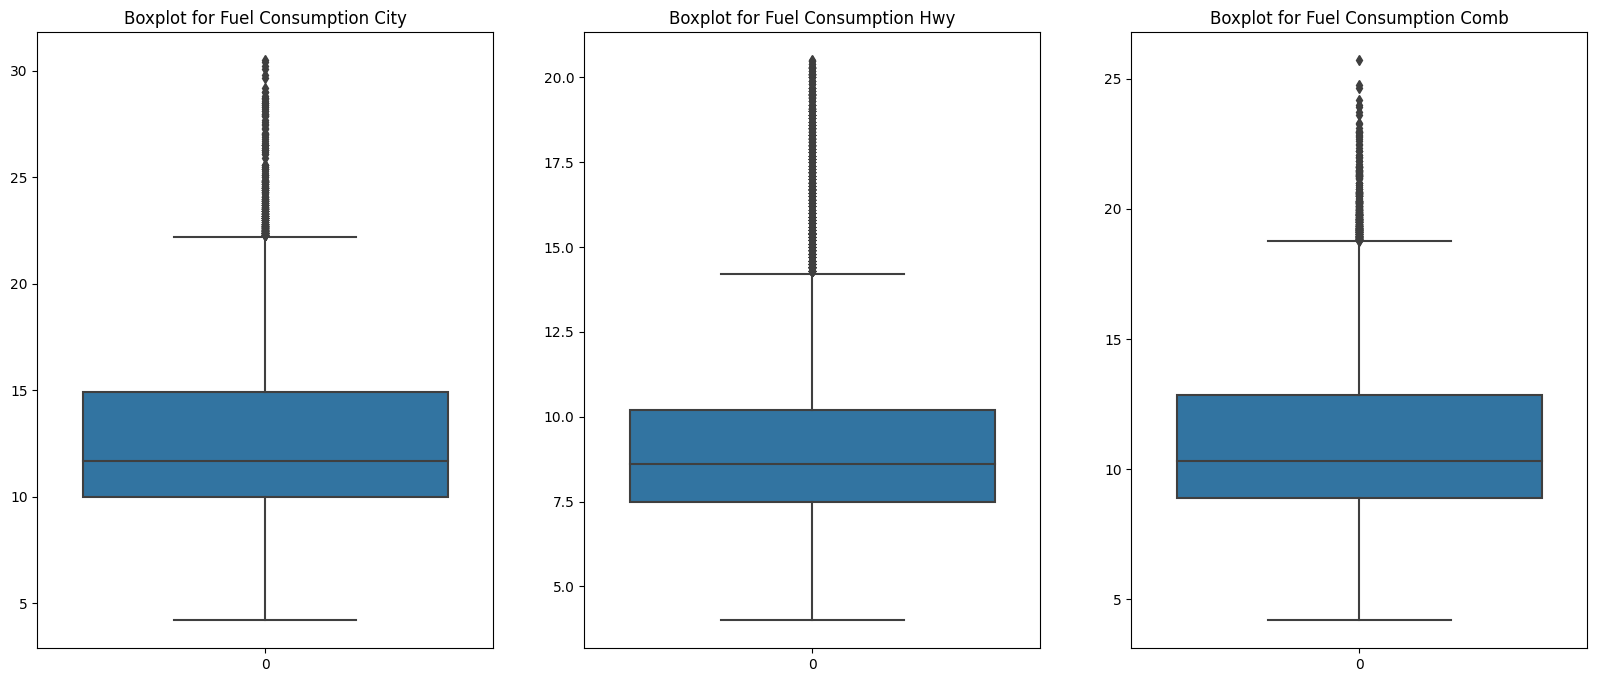

In [ ]:
columns_to_check = ['Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb']

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
for variable, subplot in zip(columns_to_check, ax.flatten()):
    sns.boxplot(test_df[variable], ax=subplot)
    subplot.set_title('Boxplot for {}'.format(variable))

plt.show()

#### **Mapping Code To Fuel Information**

In [ ]:
fuel_type_mapping = {
    'x': 'Regular gasoline',
    'z': 'Premium gasoline',
    'd': 'Diesel',
    'e': 'Ethanol (E85)',
    'n': 'Natural gas'
}

train_df['Fuel Type'] = train_df['Fuel Type'].map(fuel_type_mapping)

## **Explanatory Data Analysis (EDA)**

### **Defining Analysis Question**

1. Merk mobil apa yang paling banyak di kota Wiliwilowilev
2. Merek mobil apa yang menghasilkan emisi CO2 tertinggi ?
3. Jenis kendaraan apa yang paling banyak di kota Wiliwilowilev
4. Jenis kendaraan apa yang menghasilkan polusi tertinggi ?
5. Jenis bahan bakar apa yang paling banyak digunakan ?
6. Jenis bahan bakar apa yang paling banyak berkontribusi menghasilkan emisi gas CO2 ?
7. Bagaimana perbedaan jenis bahan bakar yang digunakan di kota dengan di jalan raya ?
8. Jenis tranmisi apa yang paling banyak digunakan di kota Wiliwilowilev ?
9. Apakah terdapat perbedaan emisi CO2 yang dihasilkan antara kendaraan dengan transmisi yang berbeda ?
10. Apakah ukuran mesin mempengaruhi emisi CO2 yang dihasilkan ?
11. Apakah jumlah silinder mempengaruhi emisi CO2 yang dihasilkan ?

### **Visualizing & Explanatory Data Analysis**

#### **Pertanyaan-1: Merk Mobil Apa Yang Paling Banyak Di Kota Wiliwilowilev ?**

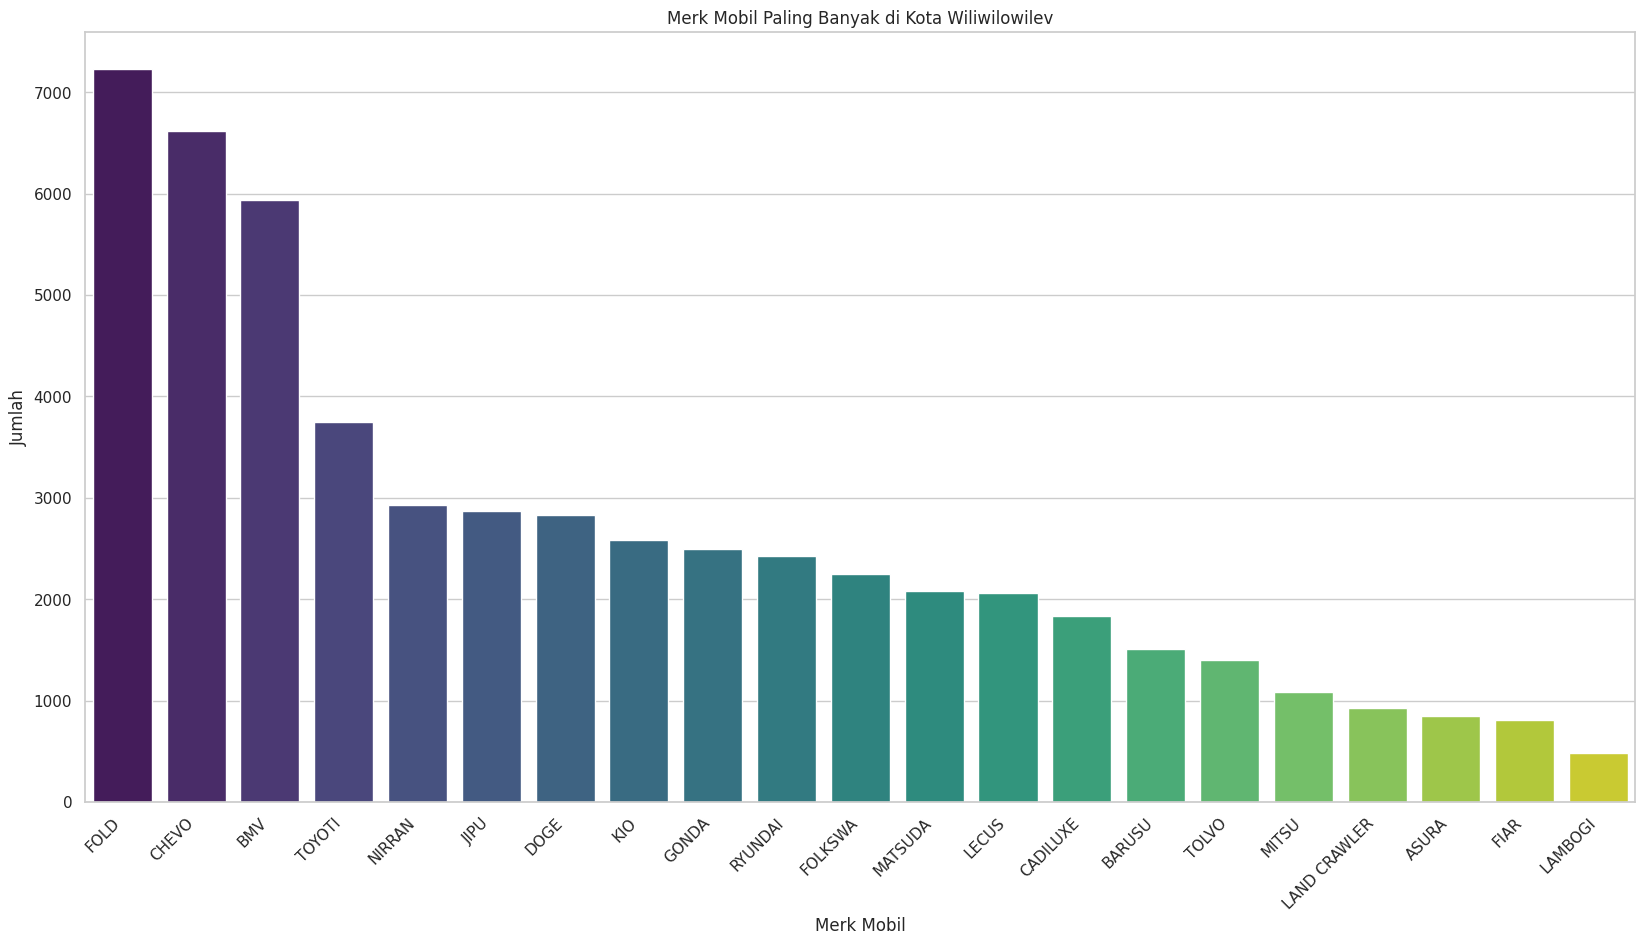

In [ ]:
make_counts = train_df['Make'].value_counts()

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')
plt.title('Merk Mobil Paling Banyak di Kota Wiliwilowilev')
plt.xlabel('Merk Mobil')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi di atas, didapatkan merk mobil yang paling banyak di kota Wiilwilowilev ialah Fold yang disusul oleh Chevo, BMV, Toyoti dan seterusnya.

#### **Pertanyaan-2: Merek Mobil Apa Yang Menghasilkan Emisi CO2 Tertinggi ?**

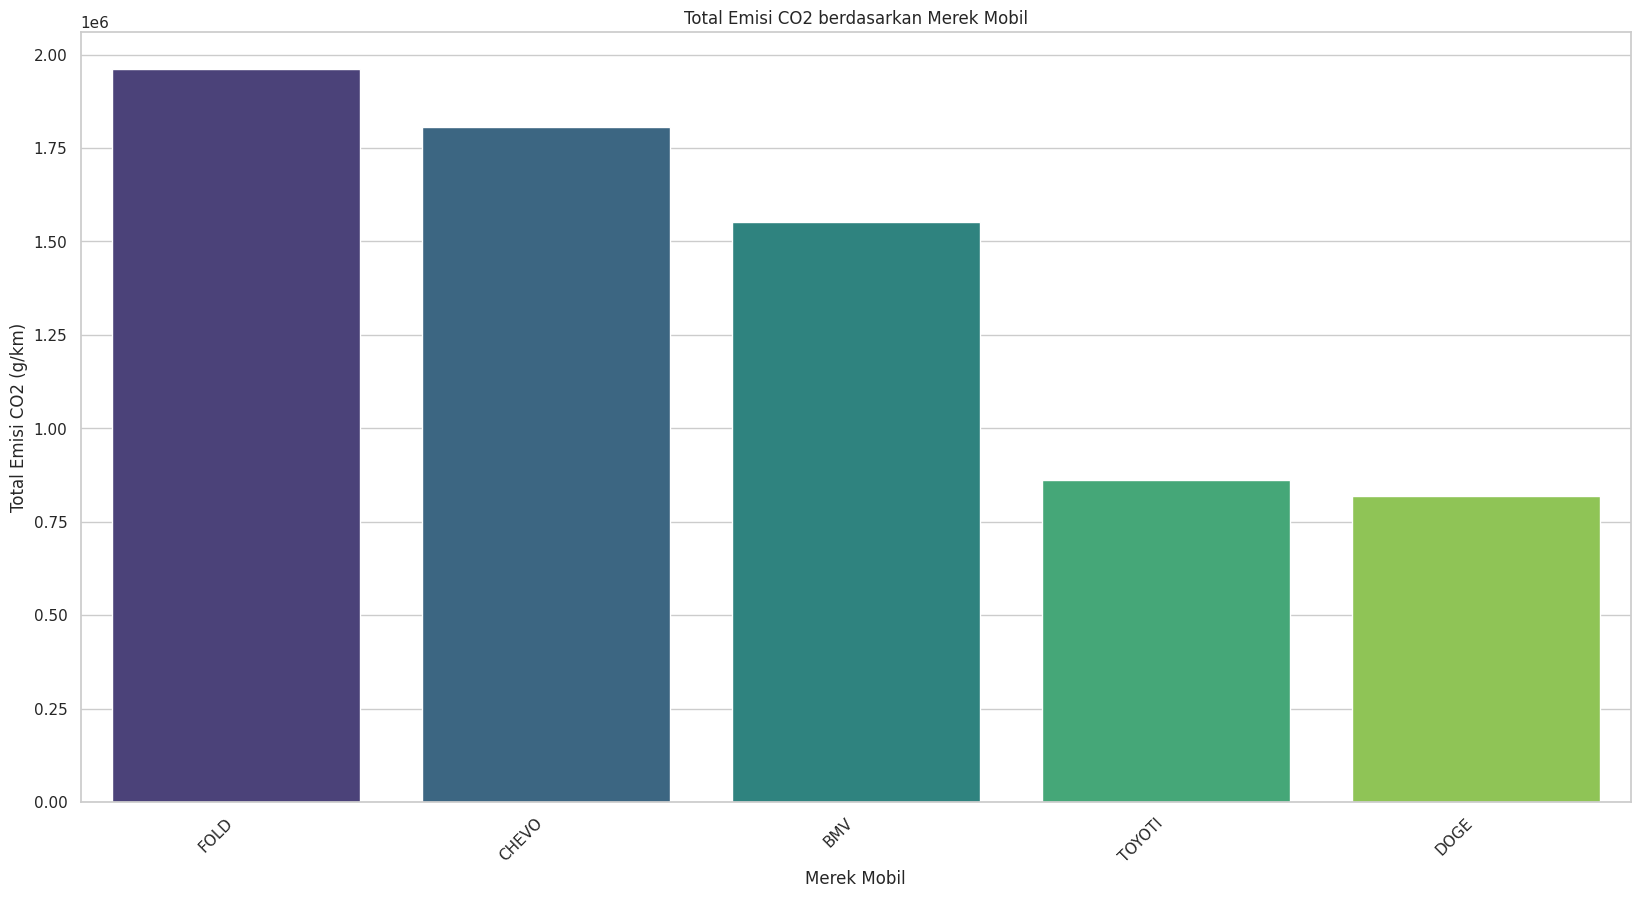

In [ ]:
# Mencari total emisi CO2 untuk setiap merek mobil
co2_by_make = train_df.groupby('Make')['CO2 Emissions(g/km)'].sum().sort_values(ascending = False).nlargest(5).reset_index()

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x='Make', y='CO2 Emissions(g/km)', data=co2_by_make, palette='viridis')
plt.title('Total Emisi CO2 berdasarkan Merek Mobil')
plt.xlabel('Merek Mobil')
plt.ylabel('Total Emisi CO2 (g/km)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi di atas, didapatkan merk mobil yang paling banyak menghasilkan polusi di kota Wiilwilowilev ialah Fold yang disusul oleh Chevo, BMV, Toyoti, dan Doge



#### **Pertanyaan-3: Jenis Kendaraan Apa Yang Paling Banyak Di Kota Wiliwilowilev ?**

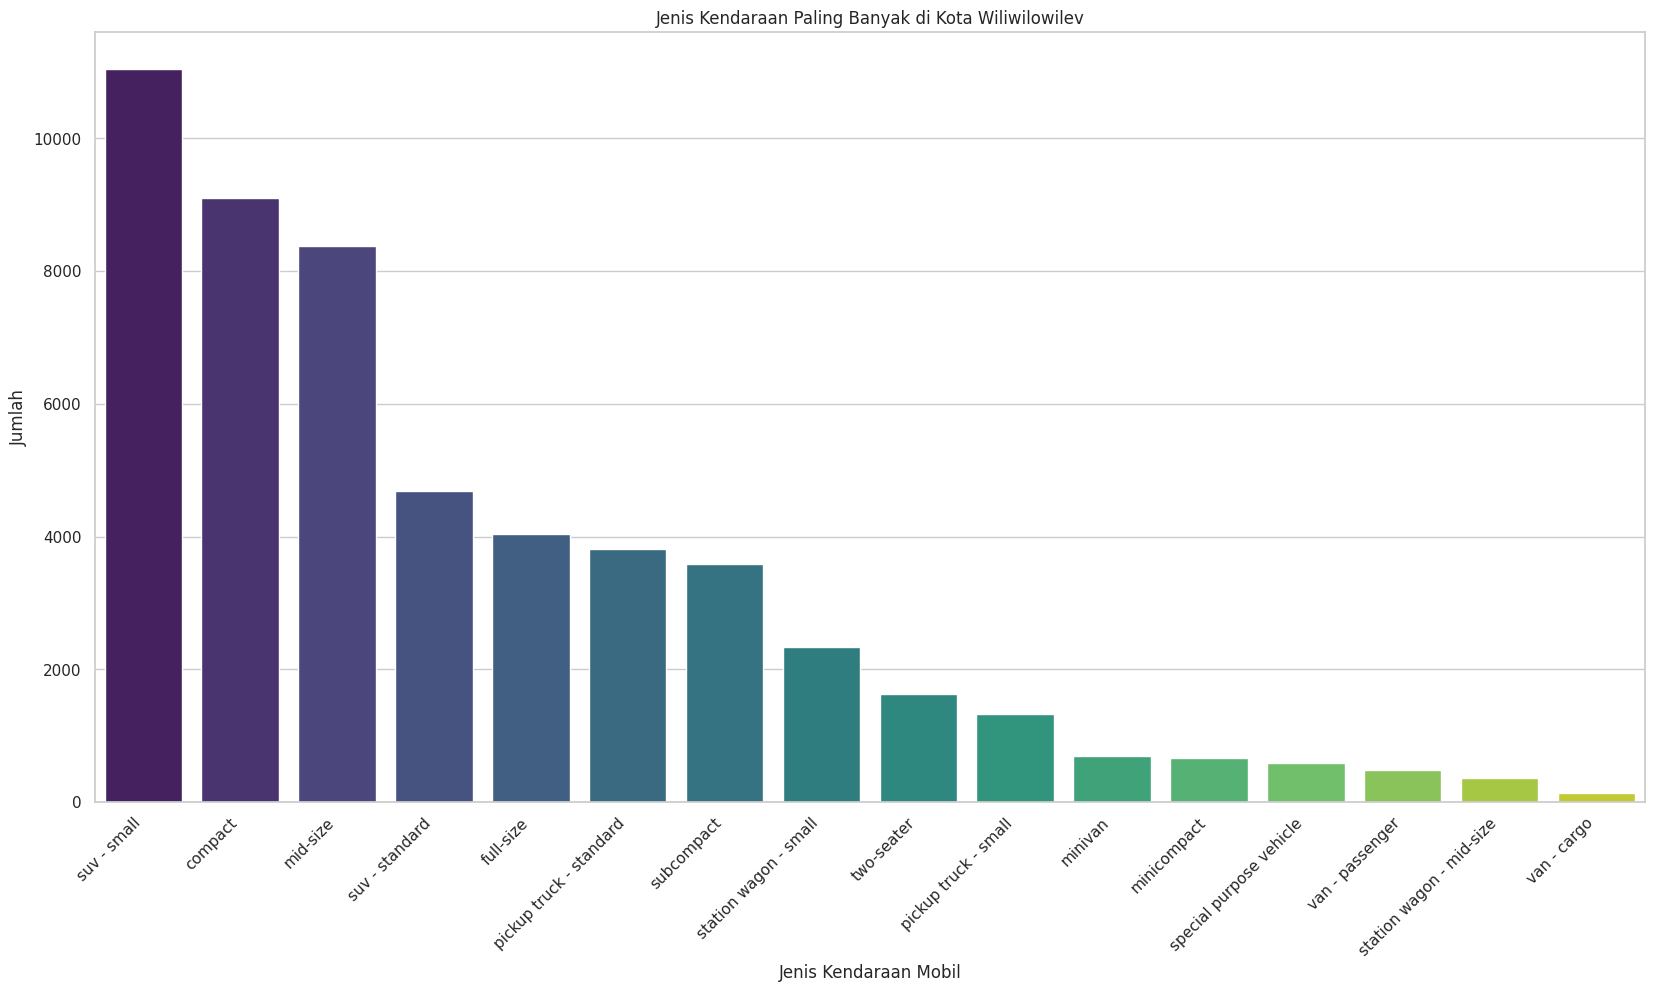

In [ ]:
vehicle_class_counts = train_df['Vehicle Class'].value_counts()

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x=vehicle_class_counts.index, y=vehicle_class_counts.values, palette='viridis')
plt.title('Jenis Kendaraan Paling Banyak di Kota Wiliwilowilev')
plt.xlabel('Jenis Kendaraan Mobil')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi di atas, didapatkan jenis kendaraan yang paling banyak digunakan di kota Wiilwilowilev ialah SUV - Small, SUV - Compact, SUV - Standard, SUV - Full Size, Pickup Truck - Standar dan seterusnya.

#### **Pertanyaan-4: Jenis Kendaraan Apa Yang Menghasilkan Polusi Tertinggi ?**

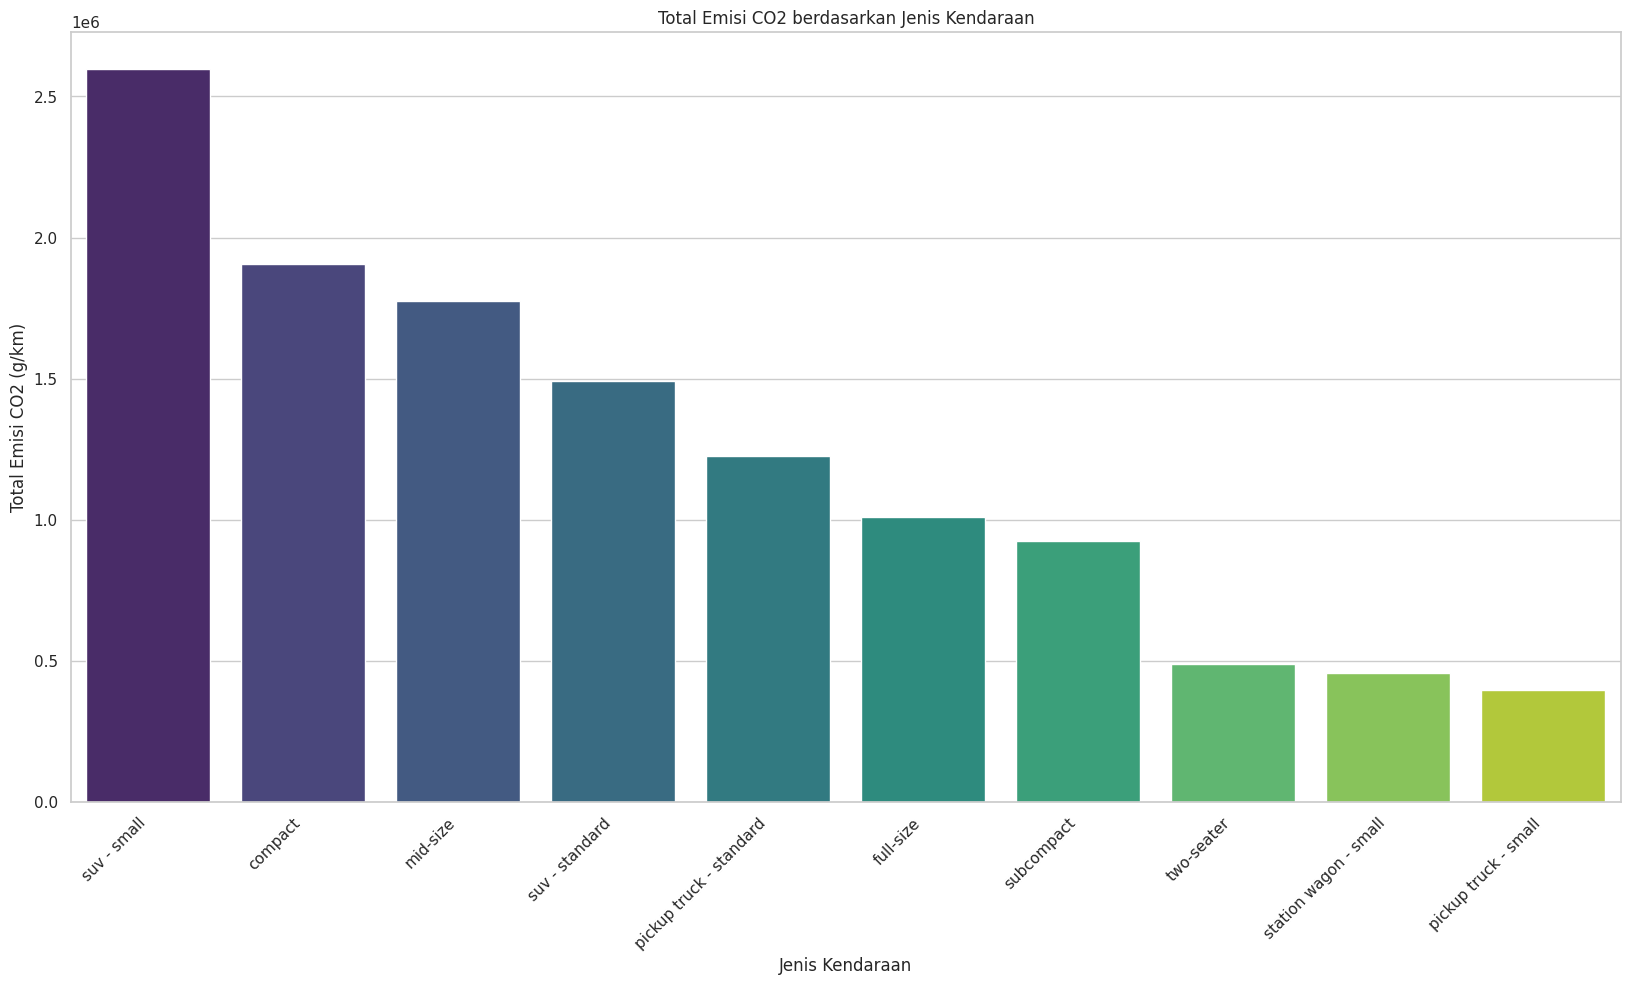

In [ ]:
# Mencari total emisi CO2 untuk setiap jenis kendaraan
co2_by_vehicle_class = train_df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].sum().sort_values(ascending = False).nlargest(10).reset_index()

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=co2_by_vehicle_class, palette='viridis')
plt.title('Total Emisi CO2 berdasarkan Jenis Kendaraan')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Total Emisi CO2 (g/km)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi di atas, didapatkan jenis kendaraan yang paling banyak menghasilkan emisi co2 di kota Wiilwilowilev ialah SUV - Small, SUV - Compact, SUV - Mid Size, SUV - Standard, Pickup Truck - Standar dan seterusnya.

#### **Pertanyaan-5: Jenis bahan bakar apa yang paling banyak digunakan ?**

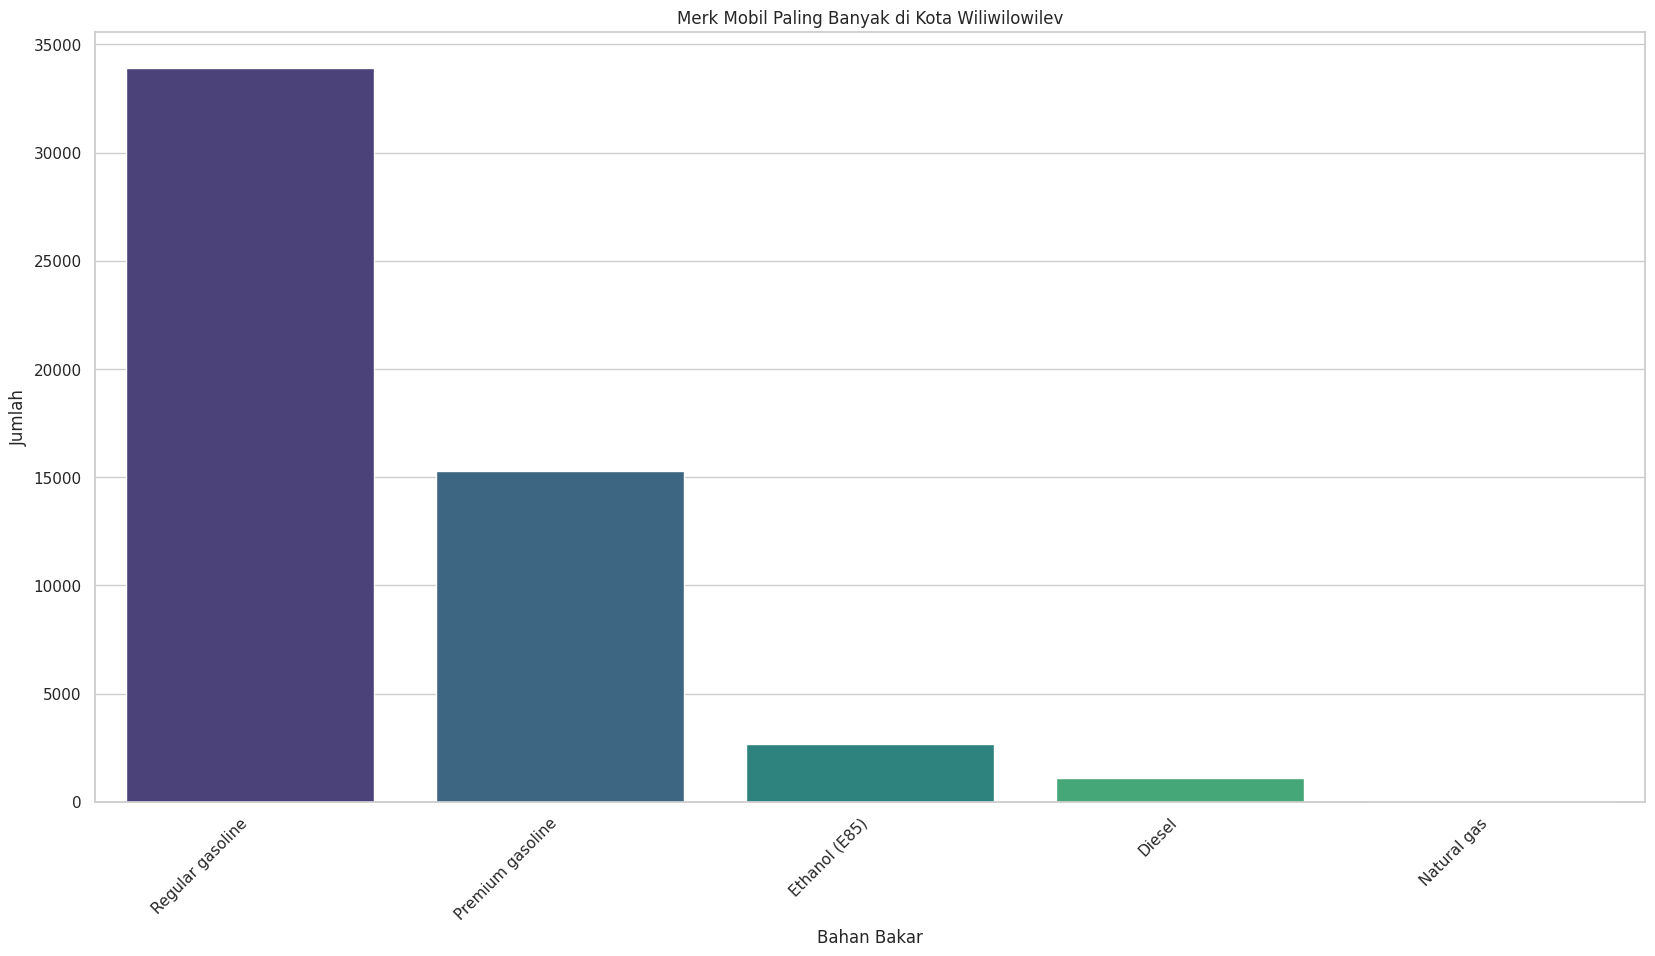

In [ ]:
fuel_type_counts = train_df['Fuel Type'].value_counts()

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette='viridis')
plt.title('Merk Mobil Paling Banyak di Kota Wiliwilowilev')
plt.xlabel('Bahan Bakar')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan visualisasi di atas, didapatkan jenis bahan bakar yang paling banyak digunakan di kota Wiilwilowilev ialah Regular Gasoline, Premium Gasoline, Ethanol, Diesel, dan yang terakhir ialah Natural Gas

#### **Pertanyaan-6: Jenis Bahan Bakar Apa Yang Paling Banyak Berkontribusi Menghasilkan Emisi Gas CO2 ?**

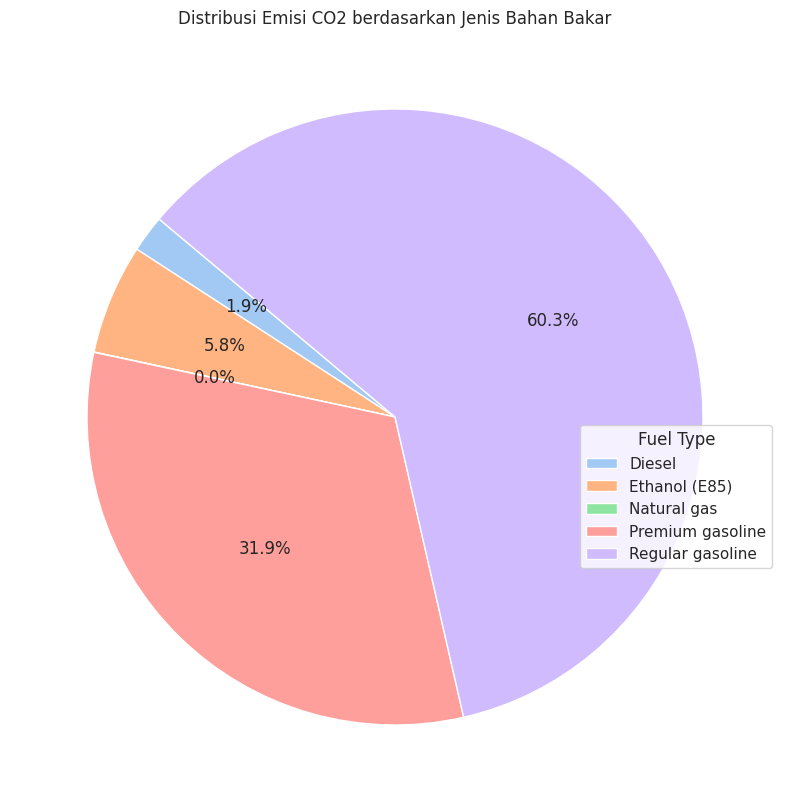


          Fuel Type  CO2 Emissions(g/km)  Percentage
0            Diesel               253834    1.941581
1     Ethanol (E85)               756628    5.787461
2       Natural gas                 1891    0.014464
3  Premium gasoline              4176360   31.945049
4  Regular gasoline              7884862   60.311445


In [ ]:
# Menghitung total emisi CO2 per jenis bahan bakar
total_emissions = train_df.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum().reset_index()

plt.figure(figsize=(10, 10))
plt.pie(total_emissions['CO2 Emissions(g/km)'], labels=None, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.legend(labels=total_emissions['Fuel Type'], title='Fuel Type', loc='upper right', bbox_to_anchor=(1, 0.5))
plt.title('Distribusi Emisi CO2 berdasarkan Jenis Bahan Bakar')
plt.show()

print()

# Menghitung persentase kontribusi masing-masing jenis bahan bakar
total_emissions['Percentage'] = (total_emissions['CO2 Emissions(g/km)'] / total_emissions['CO2 Emissions(g/km)'].sum()) * 100
print(total_emissions)

Berdasarkan visualisasi di atas, didapatkan jenis bahan bakar yang paling banyak menghasilkan emisi co2 di kota Wiilwilowilev ialah Regular Gasoline, Premium Gasoline, Ethanol, Diesel, dan yang terakhir ialah Natural Gas

#### **Pertanyaan-7: Jenis bahan bakar apa yang paling banyak digunakan di kota maupun jalan ?**

##### **Distribusi Nilai Penggunaan Bahan Bakar Di Kota**

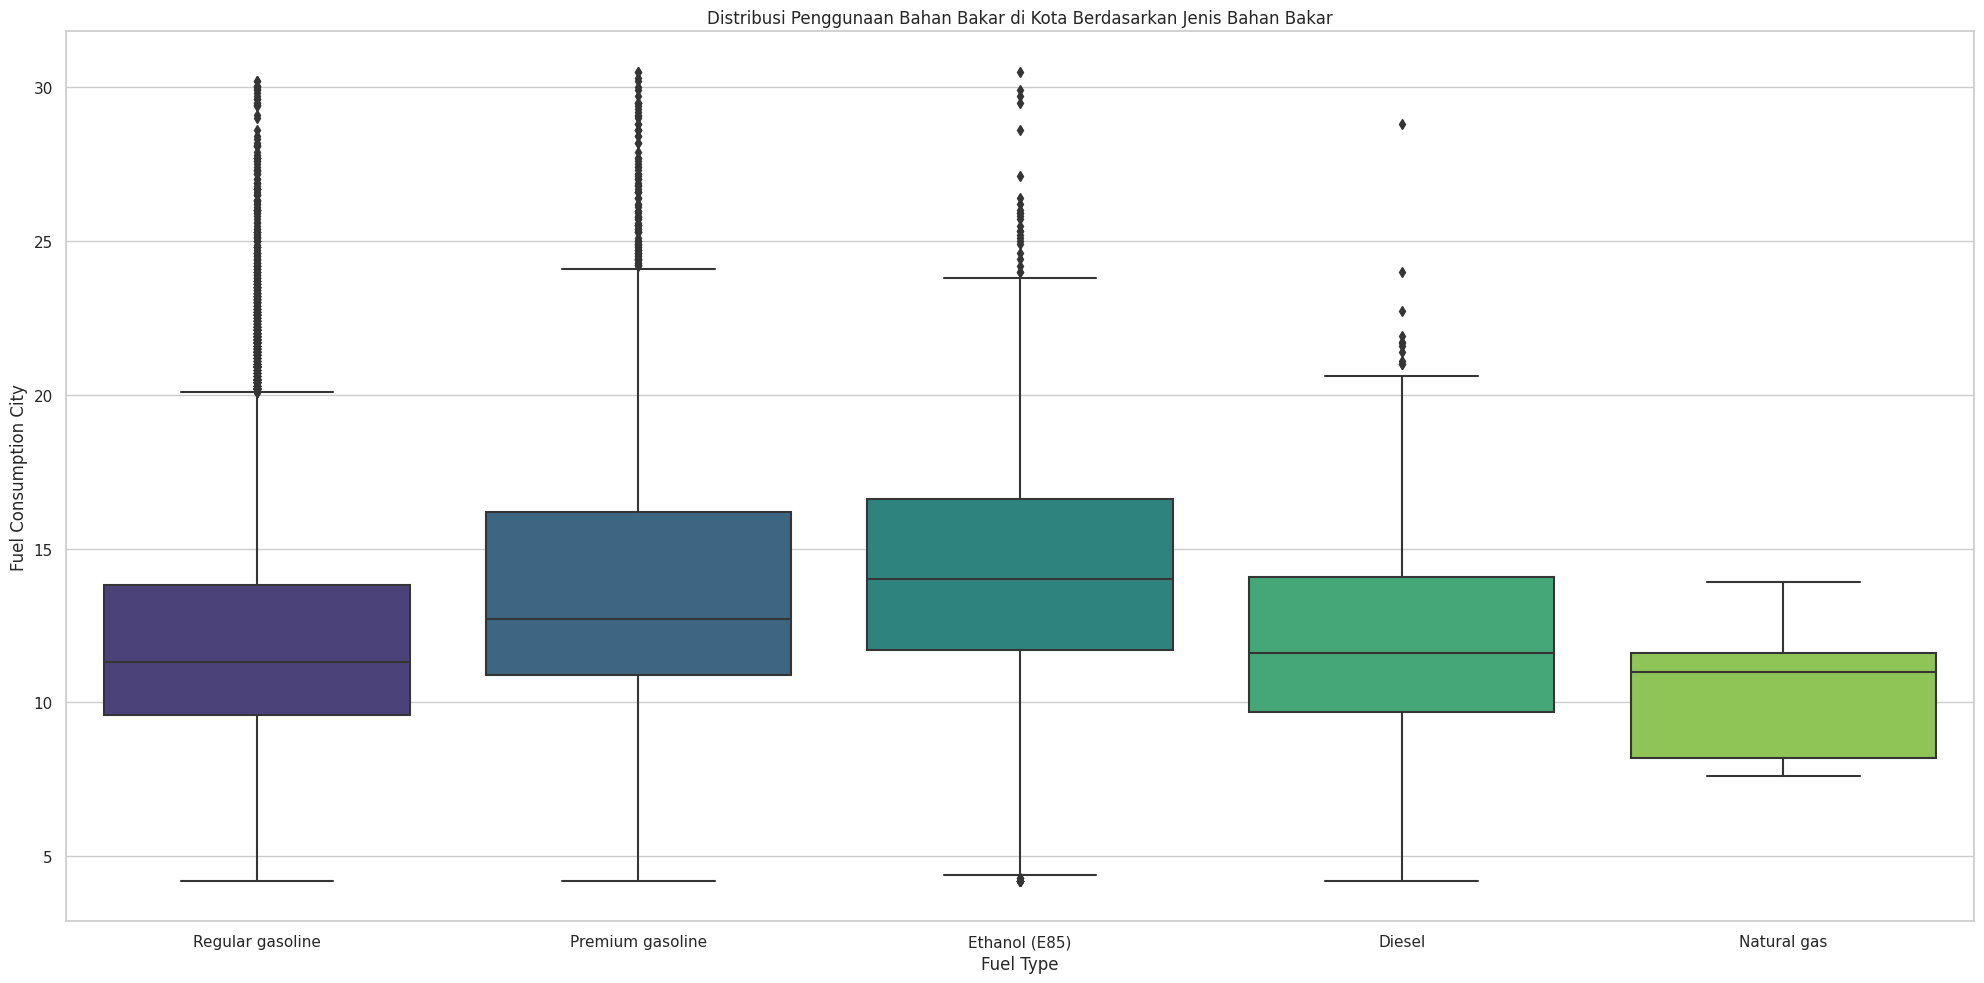

In [ ]:
sns.boxplot(x="Fuel Type", y="Fuel Consumption City", data=train_df, palette="viridis")
plt.title('Distribusi Penggunaan Bahan Bakar di Kota Berdasarkan Jenis Bahan Bakar')
plt.tight_layout()
plt.show()

##### **Distribusi Penggunaan Bahan Bakar Di Jalan Raya**

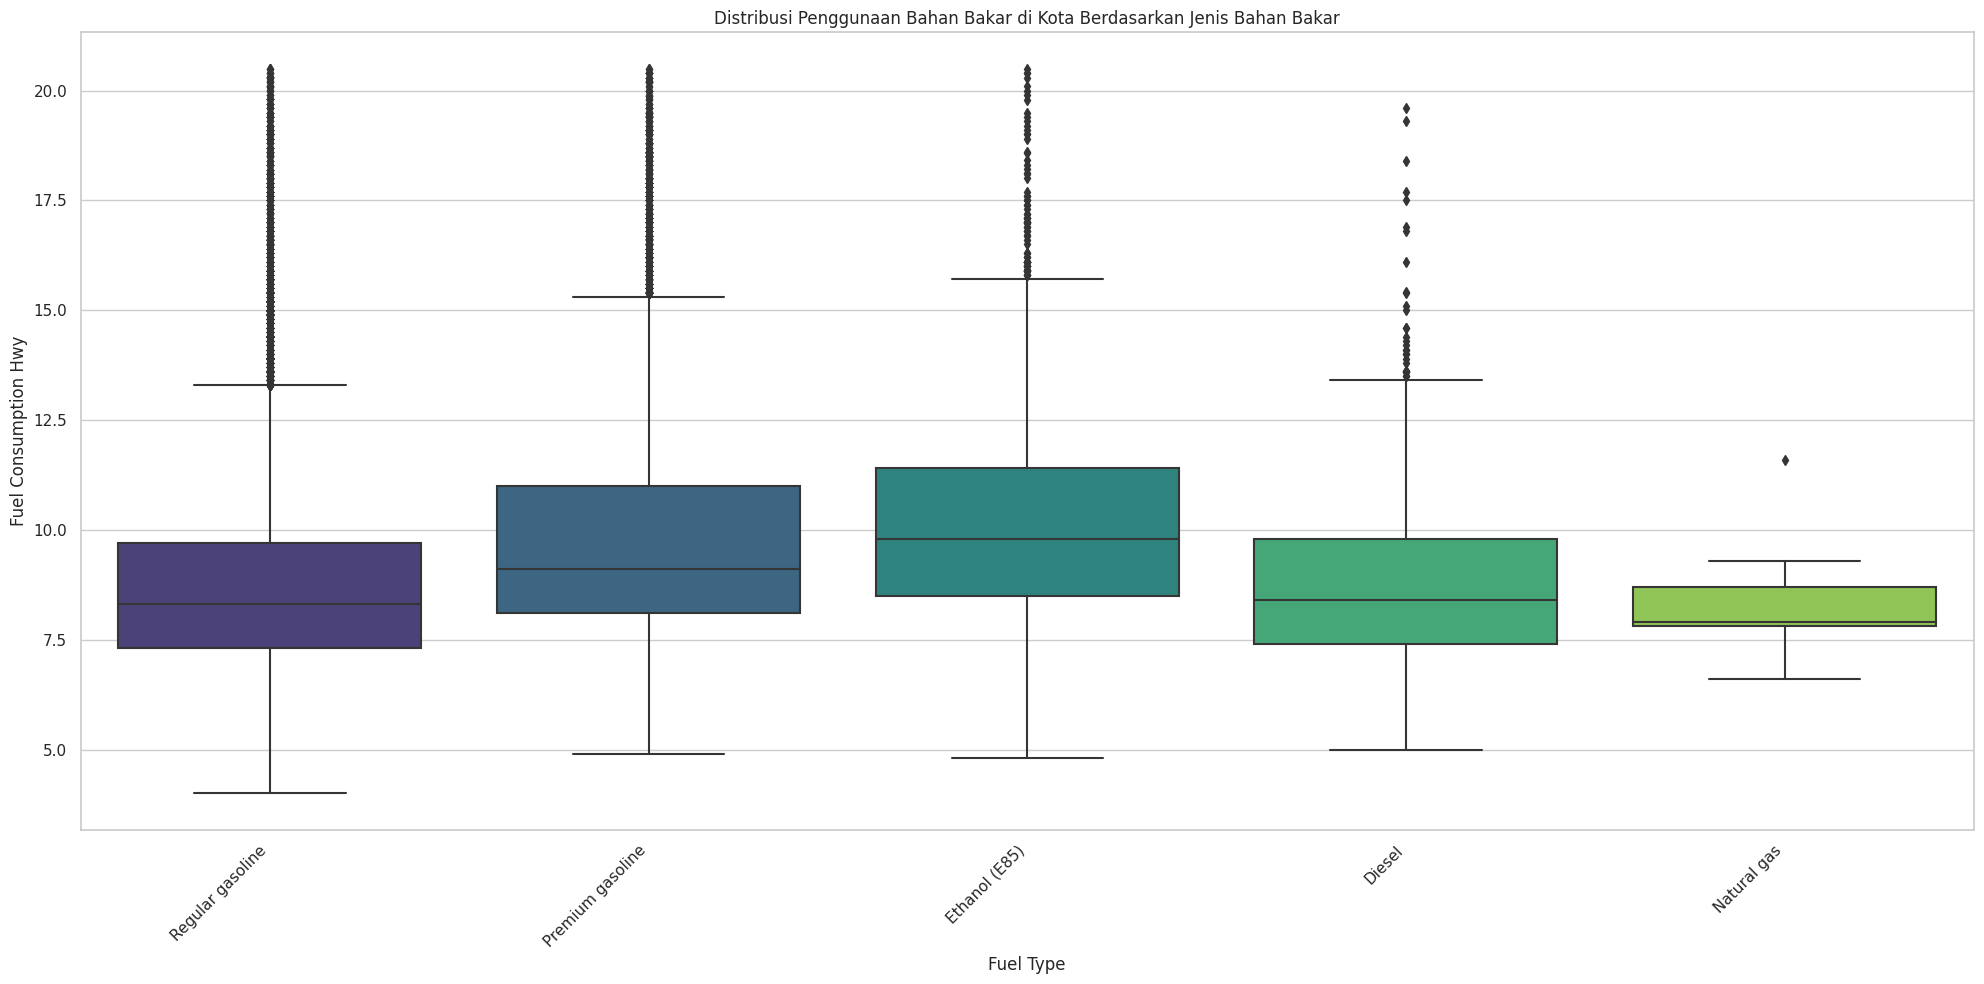

In [ ]:
sns.boxplot(x="Fuel Type", y="Fuel Consumption Hwy", data=train_df, palette="viridis")
plt.title('Distribusi Penggunaan Bahan Bakar di Kota Berdasarkan Jenis Bahan Bakar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Pertanyaan-8: Jenis Transmisi Apa Yang Paling Banyak Digunakan Di Kota Wiliwilowilev**

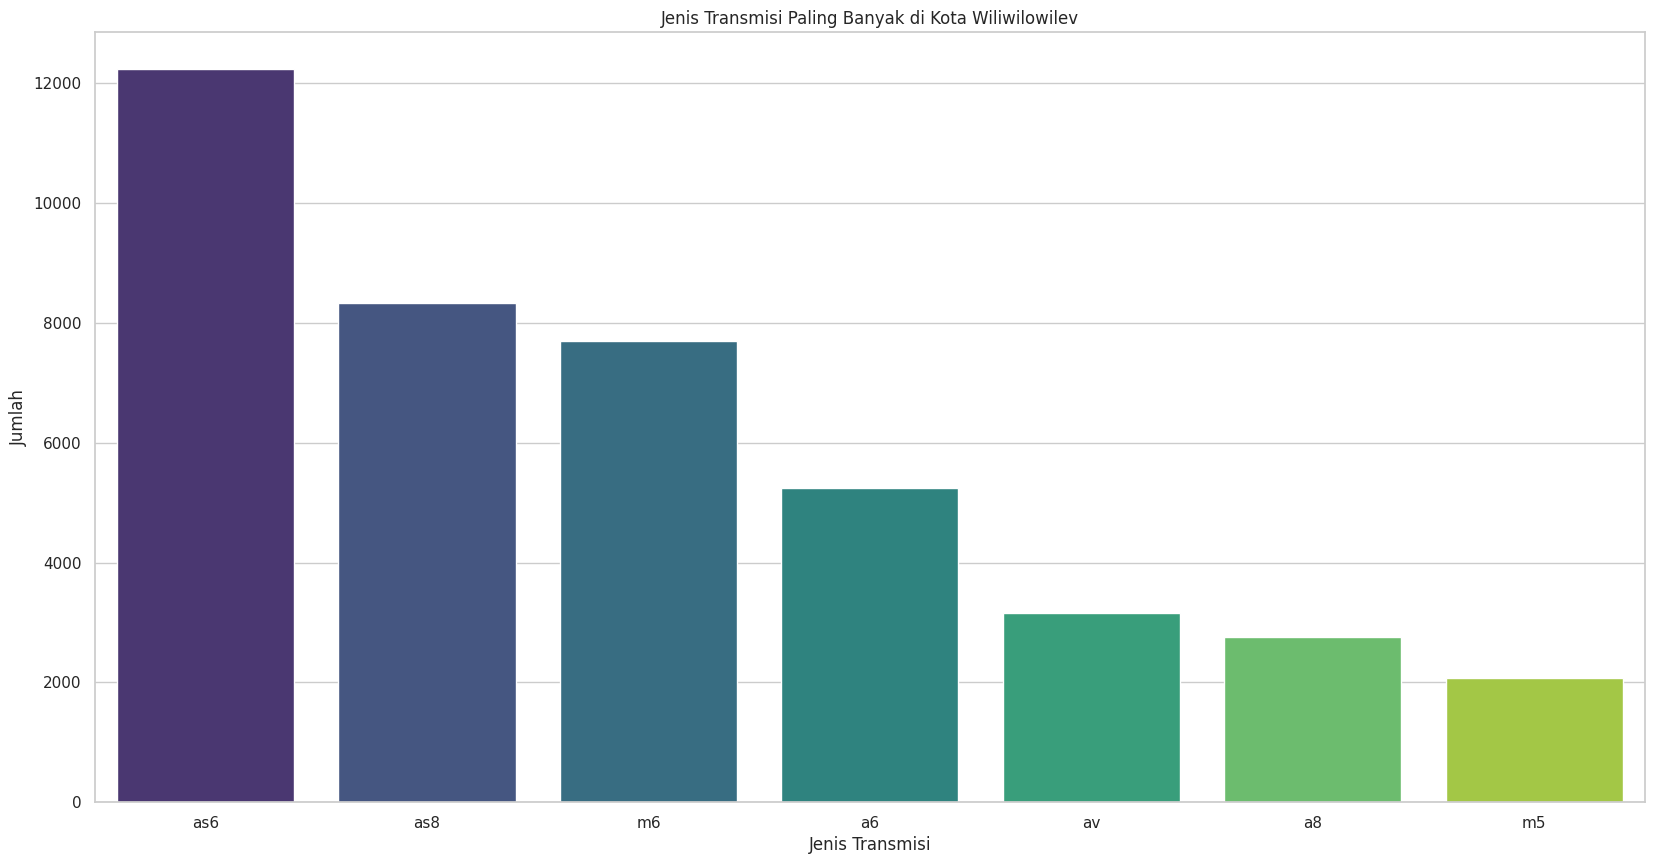

In [ ]:
transmission_counts = train_df['Transmission'].value_counts().nlargest(7)

sns.set(style='whitegrid', rc={"figure.figsize":(20,10)})
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='viridis')
plt.title('Jenis Transmisi Paling Banyak di Kota Wiliwilowilev')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan visualisasi di atas, didapatkan jenis transmisi yang paling banyak digunakan di kota Wiliwilowolev transmisi AS7, AS8, M6, dan seterusnya.

#### **Pertanyaan-9: Apakah Terdapat Perbedaan Emisi CO2 Yang Dihasilkan Antar Kendaraan Dengan Transmisi Yang Berbeda ?**

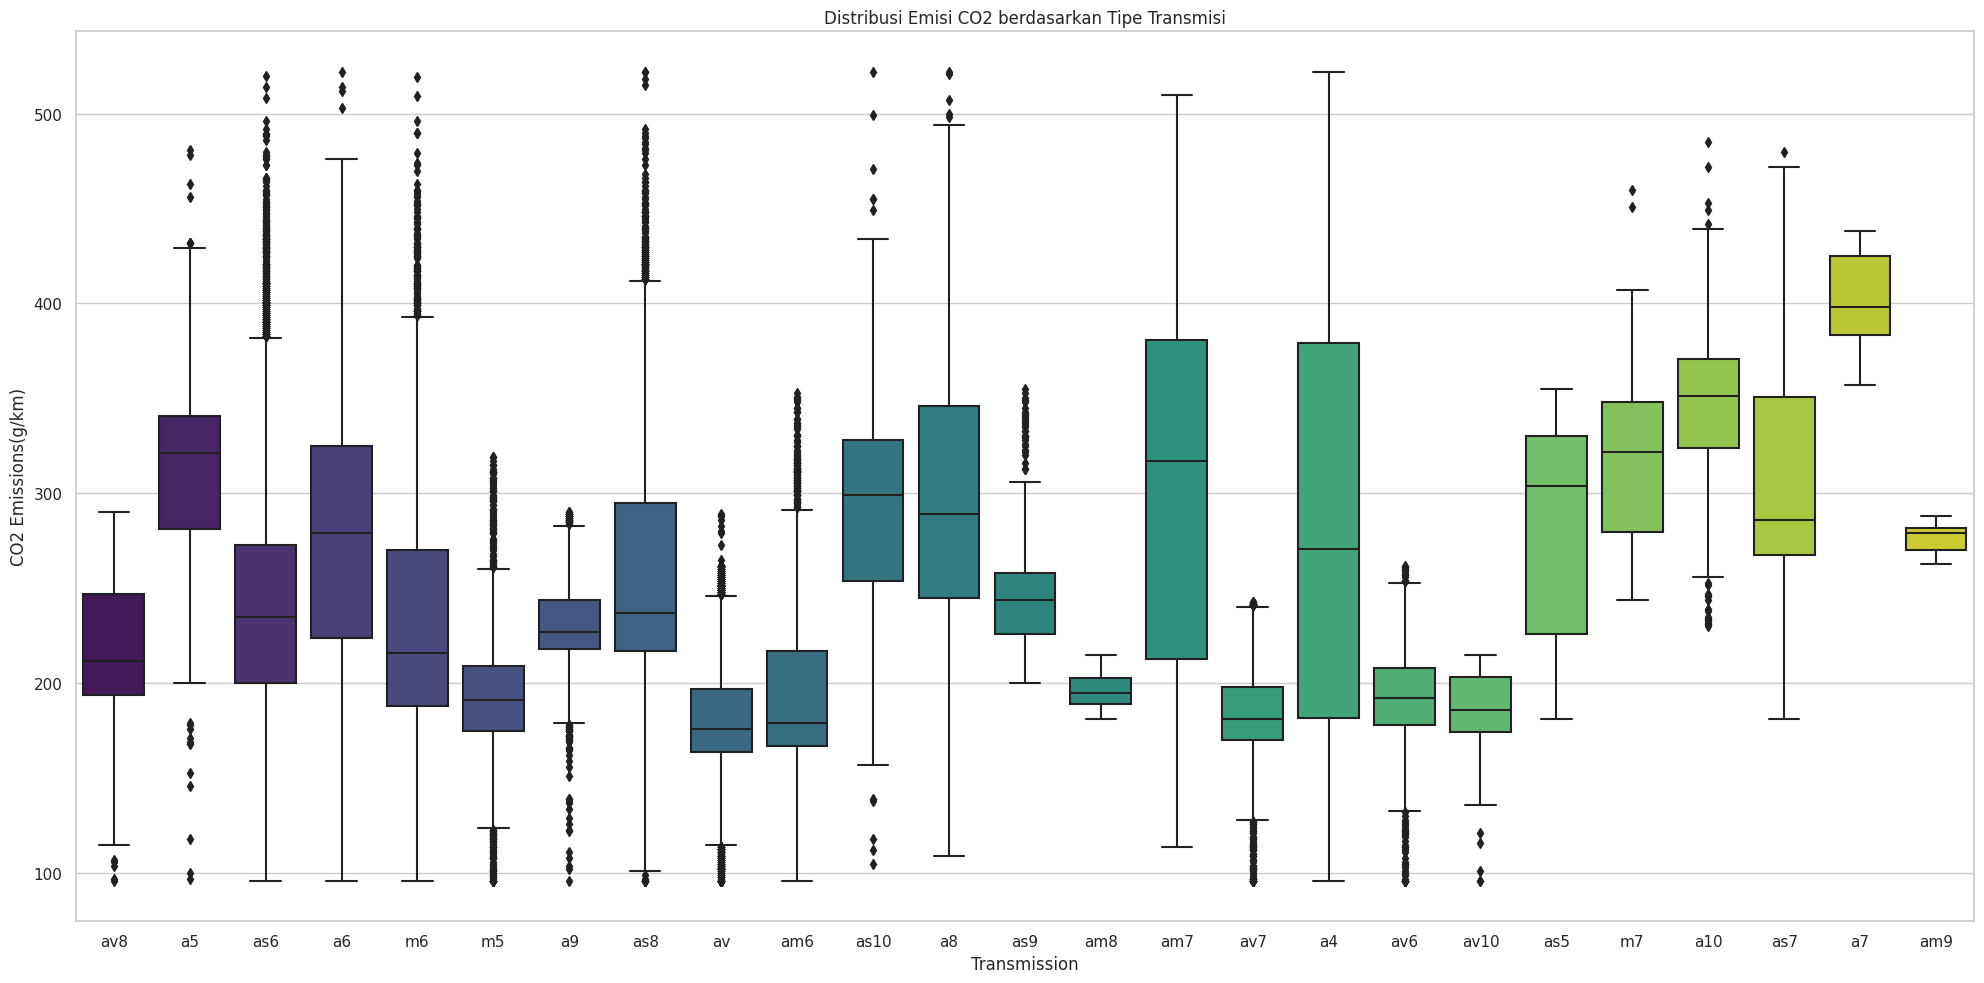

In [ ]:
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=train_df, palette="viridis")
plt.title('Distribusi Emisi CO2 berdasarkan Tipe Transmisi')
plt.tight_layout()
plt.show()

Didapatkan berbeda transmisi maka beda pula emisi CO2 yang dihasilkan

#### **Pertanyaan-10: Apakah ukuran mesin mempengaruhi emisi CO2 yang dihasilkan ?**

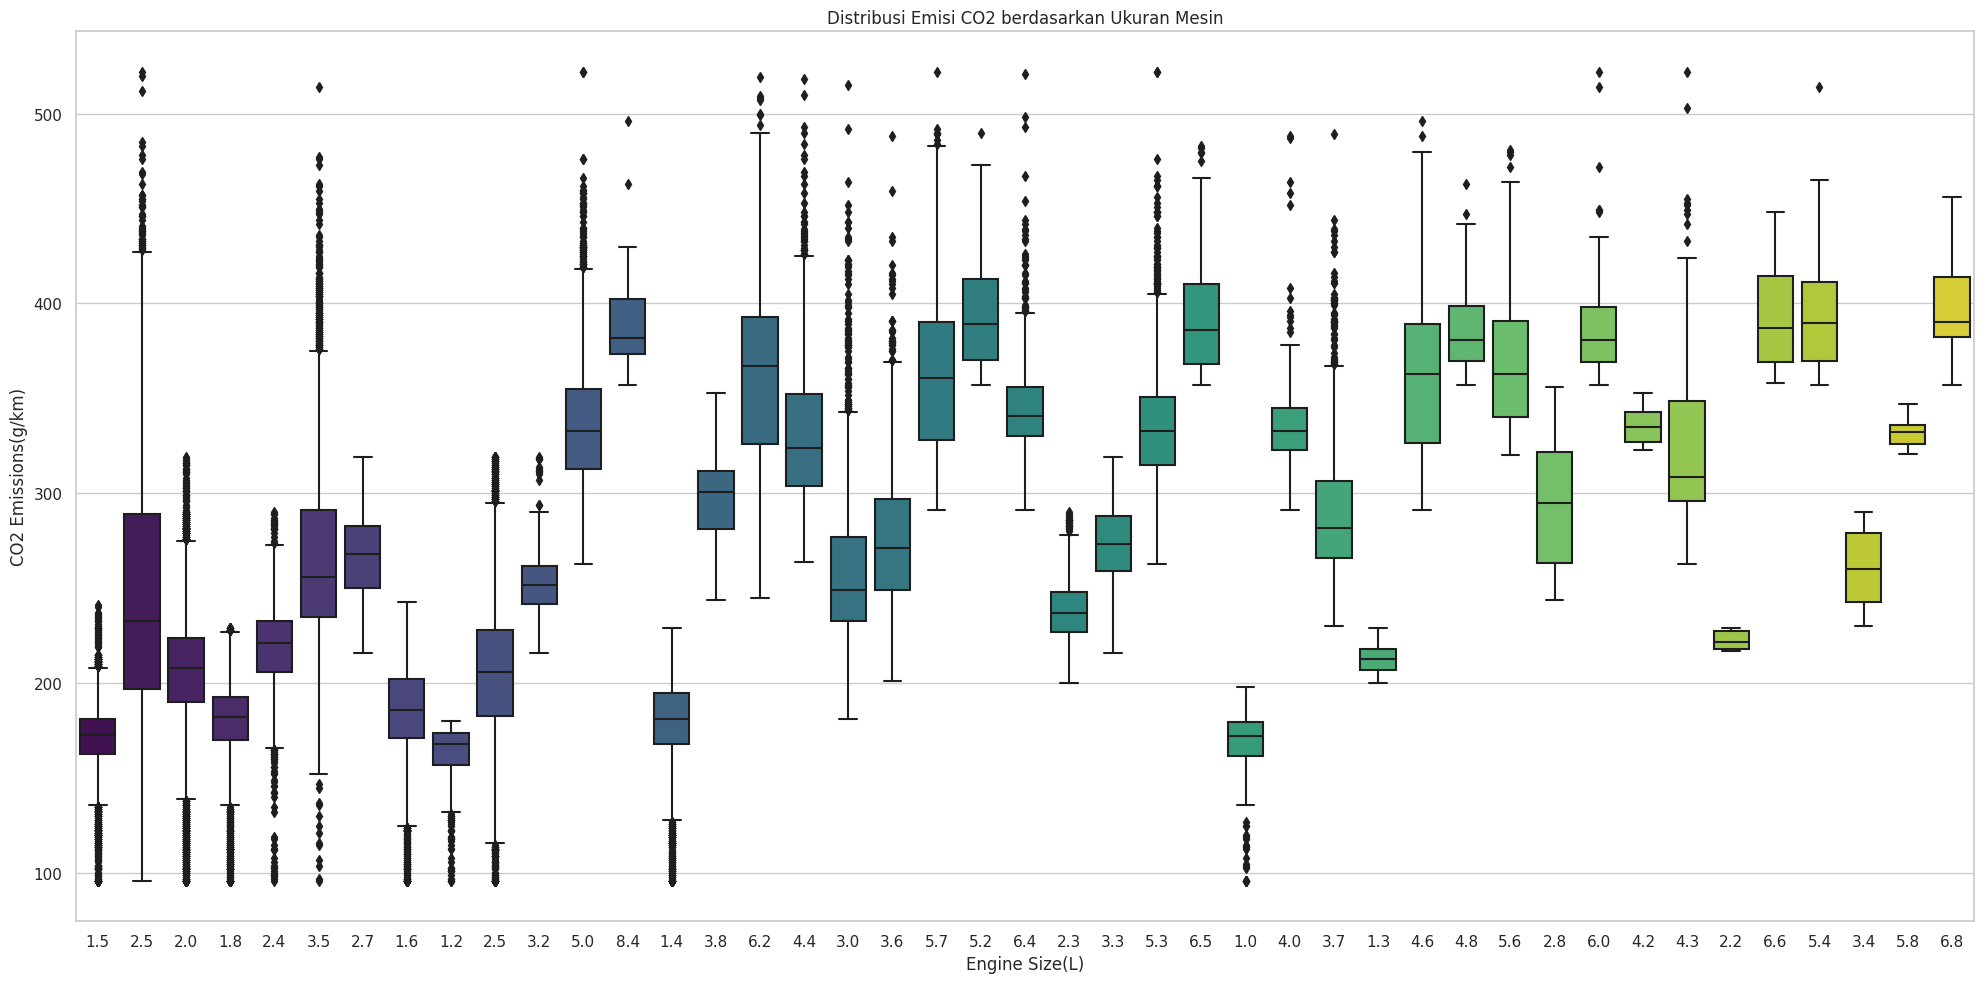

In [ ]:
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=train_df, palette="viridis")
plt.title('Distribusi Emisi CO2 berdasarkan Ukuran Mesin')
plt.tight_layout()
plt.show()

Didapatkan semakin besar ukuran mesin maka semakin besar pula emisi CO2 yang dihasilkan

#### **Pertanyaan-11: Apakah jumlah silinder mempengaruhi emisi CO2 yang dihasilkan ?**

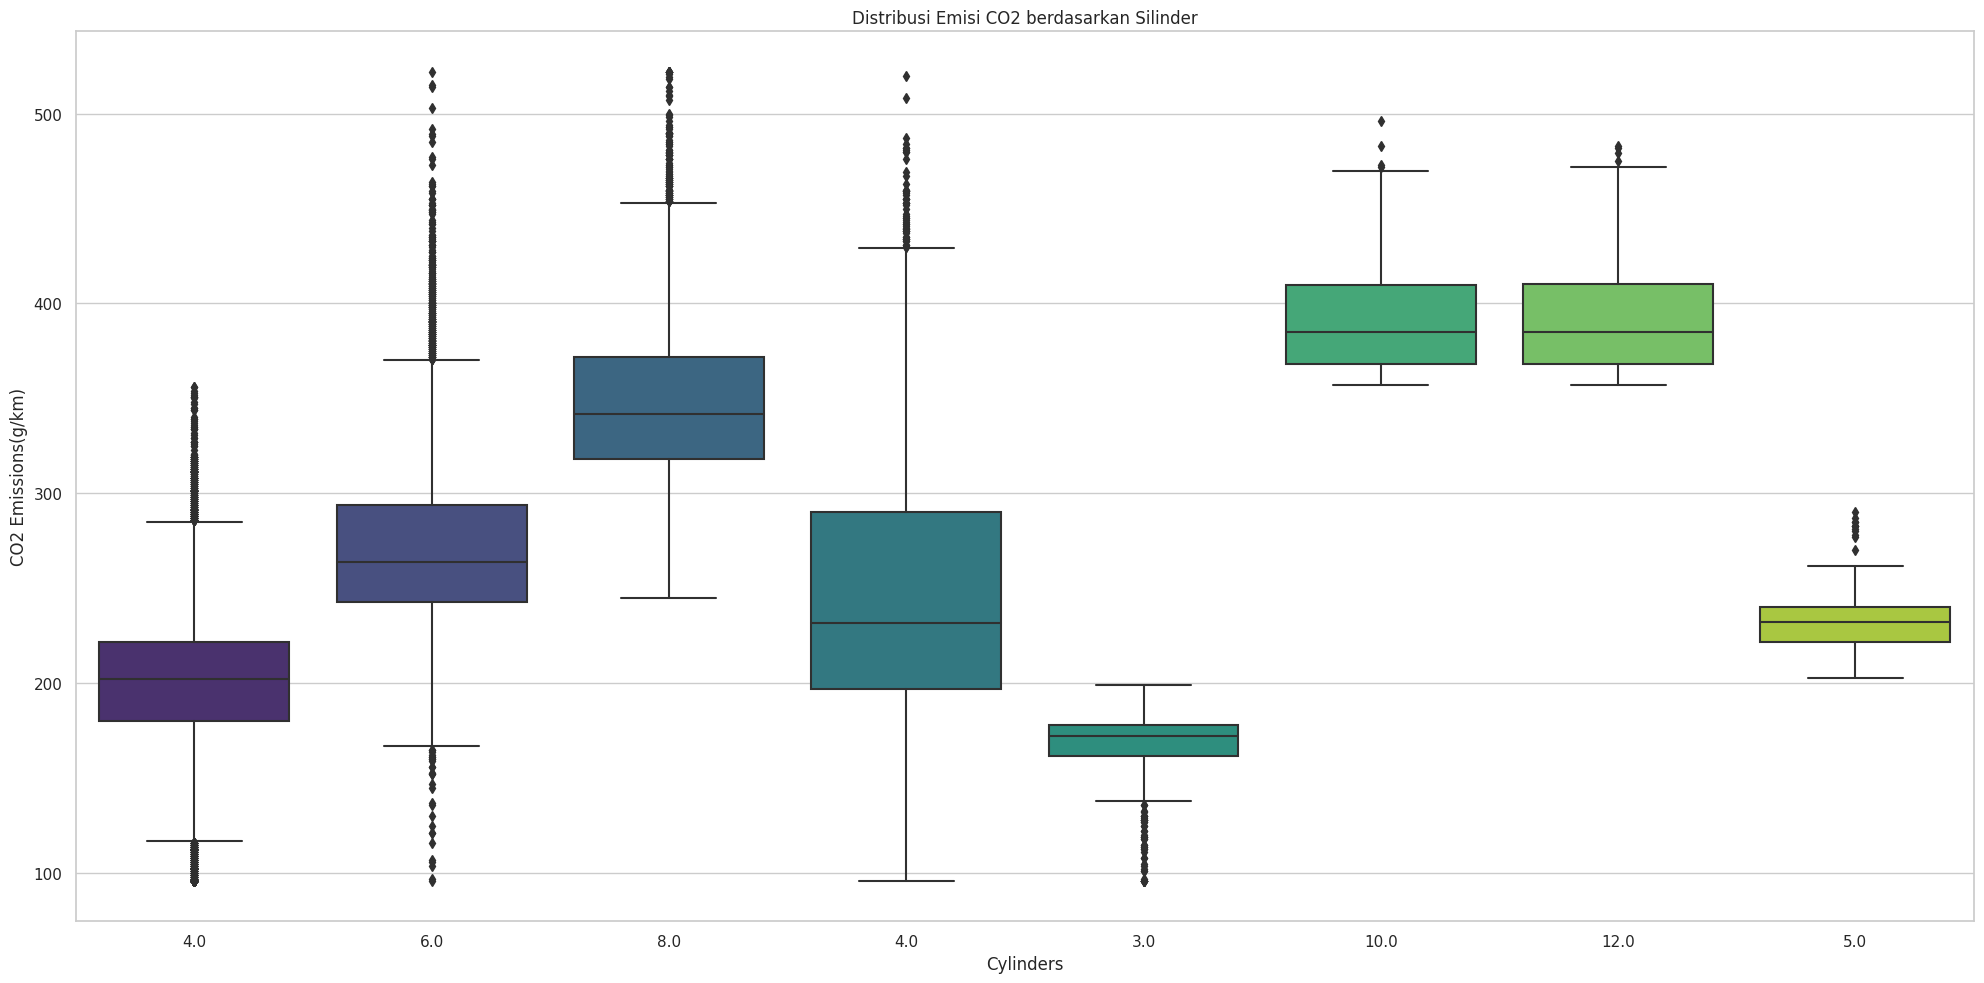

In [ ]:
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=train_df, palette="viridis")
plt.title('Distribusi Emisi CO2 berdasarkan Silinder')
plt.tight_layout()
plt.show()

In [ ]:
avg_emissions_per_make = (train_df['CO2 Emissions(g/km)'].sum() / train_df["Make"].value_counts())
avg_emissions_per_make.sort_values(ascending = False)

LAMBOGI         28352.167364
FIAR            16877.130760
ASURA           15981.528302
LAND CRAWLER    14588.090420
MITSU           12513.698984
TOLVO            9707.977077
BARUSU           8975.056954
CADILUXE         7381.446623
LECUS            6562.874576
MATSUDA          6524.957150
FOLKSWA          6028.619217
RYUNDAI          5586.288541
GONDA            5433.975942
KIO              5254.880186
DOGE             4788.811307
JIPU             4725.361227
NIRRAN           4626.949812
TOYOTI           3613.956267
BMV              2283.844961
CHEVO            2046.871470
FOLD             1873.681183
Name: Make, dtype: float64

In [ ]:
avg_emissions_per_fuel = (train_df['CO2 Emissions(g/km)'].sum() / train_df["Fuel Type"].value_counts())
avg_emissions_per_fuel.sort_values(ascending = True)

Regular gasoline    3.998093e+02
Premium gasoline    8.853685e+02
Ethanol (E85)       5.056842e+03
Diesel              1.229795e+04
Natural gas         1.505815e+06
Name: Fuel Type, dtype: float64

Didapatkan semakin besar silinder maka semakin besar pula emisi CO2 yang dihasilkan

### **Conclusions And Recommendations**

#### **Conclusions**

1. **Merk Mobil yang Berkontribusi Besar Terhadap Emisi CO2:**
Merek-merek mobil yang telah disebutkan, yaitu Fold, Chevo, BMV, Toyoti, dan Doge, disebut sebagai penyumbang emisi CO2 terbesar. Hal ini menunjukkan bahwa mobil-mobil dari merek-merek ini memiliki dampak besar terhadap emisi gas rumah kaca, khususnya karbon dioksida (CO2).
2. **Kondisi Ekonomi:** Dominasi merek tertentu seperti yang dijelaskan pada poin 1, terutama jika merek tersebut cenderung mahal, dapat mencerminkan tingkat daya beli yang tinggi di kota Wiliwilowolev. Hal ini bisa menjadi indikator kondisi ekonomi yang relatif baik.
3. **Tren Kendaraan Berukuran Besar:** Diketahui bahwa SUV (Small, Compact, dan Mid Size) dan Pickup Truck mendominasi jenis kendaraan di kota tersebut. Ini mungkin menunjukkan bahwa penduduk kota ini cenderung memilih kendaraan berukuran besar atau off-road, mungkin karena kondisi jalan, kebutuhan transportasi, atau preferensi pribadi.  
4. **Jenis Mobil Penyumbang Polusi Udara Terbesar:** jenis mobil seperti SUV (berbagai ukuran) dan Pickup Truck standar memiliki kontribusi yang signifikan terhadap emisi CO2 atau polusi udara. Ini menunjukkan bahwa kategori kendaraan ini memiliki dampak lingkungan yang cukup besar.
5. **Dominasi Bahan Bakar Konvensional:** Fakta bahwa Regular Gasoline dan Premium Gasoline merupakan jenis bahan bakar yang paling banyak digunakan menunjukkan dominasi bahan bakar konvensional berbasis minyak bumi. Ini mencerminkan tren umum di banyak negara di mana bahan bakar berbasis minyak masih mendominasi pasar.
6. **Korelasi antara Jumlah Penggunaan dan Emisi CO2:** Korelasi ini menunjukan bahwa jumlah emisi CO2 sebanding dengan jumlah pemakai menunjukkan adanya korelasi positif antara volume penggunaan bahan bakar dan emisi CO2. Ini sesuai dengan prinsip dasar bahwa semakin banyak bahan bakar digunakan, semakin besar pula emisi yang dihasilkan.
7. **Perbedaan Pemakaian Bahan Bakar antara Kota dan Jalan Raya:** Fakta bahwa pemakaian bahan bakar untuk kendaraan di kota sedikit lebih banyak daripada penggunaannya di jalan raya menunjukkan bahwa aktivitas kendaraan di lingkungan perkotaan memiliki kontribusi signifikan terhadap total konsumsi bahan bakar. Ini bisa dipengaruhi oleh kepadatan lalu lintas, karakteristik perjalanan pendek, atau pola perjalanan yang berbeda di kota.
8. **Preferensi Jenis Transmisi:** Fakta bahwa jenis transmisi AS6 (presumably Automatic Six-speed) adalah yang paling banyak digunakan menunjukkan bahwa kebanyakan kendaraan di lingkungan tersebut menggunakan transmisi otomatis dengan enam percepatan. Ini mencerminkan preferensi konsumen atau kebijakan industri terkait jenis transmisi tertentu.
9. **Dominasi Transmisi Otomatis dalam Emisi CO2:**
Kendaraan dengan transmisi otomatis lebih berpotensi untuk menghasilkan emisi CO2 yang lebih tinggi dibandingkan dengan transmisi manual.
10. **Hubungan Positif antara Ukuran Mesin dan Emisi CO2:**
Semakin besar ukuran mesin, semakin besar pula emisi CO2 yang dihasilkan oleh kendaraan. Ini mencerminkan karakteristik umum bahwa mesin yang lebih besar cenderung mengonsumsi lebih banyak bahan bakar, yang dapat menghasilkan emisi CO2 yang lebih tinggi.
11. **Hubungan antara Jumlah Silinder dan Emisi CO2:**
Terdapat hubungan positif antara jumlah silinder mesin dan emisi CO2. Artinya, semakin besar jumlah silinder, semakin besar pula emisi CO2 yang dihasilkan oleh kendaraan. Ini merupakan hal yang umum karena mesin dengan lebih banyak silinder cenderung memerlukan lebih banyak bahan bakar dan menghasilkan lebih banyak emisi.

#### **Recommendations**

##### **Rekomendasi Untuk Pemerintah**

1.   **Peningkatan Transportasi Publik:** Mendorong dan meningkatkan infrastruktur transportasi publik untuk mengurangi penggunaan kendaraan pribadi dan meminimalkan kemacetan lalu lintas.
2.   **Penanaman Pohon dan Peningkatan Ruang Hijau:** Melakukan program penanaman pohon massal dan meningkatkan ruang hijau di kota untuk membantu menyerap emisi dan meningkatkan kualitas udara.
3.   **Penyusunan Kebijakan Lingkungan:** Membuat dan mengimplementasikan kebijakan lingkungan yang ketat untuk mengontrol emisi kendaraan bermotor, pabrik, dan sumber-sumber polusi lainnya.
4.   **Pendidikan Lingkungan:** Mengimplementasikan program pendidikan lingkungan di sekolah dan masyarakat untuk meningkatkan kesadaran tentang dampak polusi dan cara menguranginya.


##### **Rekomendasi Untuk Penduduk**

1.   **Penggunaan Transportasi Ramah Lingkungan:** Memilih menggunakan transportasi publik, bersepeda, atau berjalan kaki untuk mengurangi penggunaan kendaraan pribadi dan emisi gas buang.
2.   **Pemilihan Bahan Bakar Bersih:** Jika memungkinkan, memilih bahan bakar yang lebih bersih dan ramah lingkungan, seperti bahan bakar alternatif atau bahan bakar dengan kandungan rendah sulfur.
3.   **Pemeliharaan Kendaraan:** Melakukan pemeliharaan teratur pada kendaraan untuk memastikan efisiensi dan mengurangi emisi. Memilih kendaraan dengan efisiensi bahan bakar tinggi.
4.  **Partisipasi dalam Program Penanaman Pohon:** Mengambil bagian dalam program penanaman pohon dan menjaga keberlanjutan lingkungan dengan mendukung inisiatif yang bertujuan mengurangi dampak polusi.

